In [1]:
%matplotlib notebook

import math

import sympy

import geometrik.threed as g3d
from geometrik.threed.plot import UnitSpherePlot

import goto.globe.blip
import goto.globe.lineto

In [2]:
BOD = goto.globe.blip.Blip(44.828333, -0.715556).as_vector
MXP = goto.globe.blip.Blip(45.63, 8.723056).as_vector
MRS = goto.globe.blip.Blip(43.436667, 5.215).as_vector
LHR = goto.globe.blip.Blip(51.4775, -0.461389).as_vector
LIS = goto.globe.blip.Blip(38.774167, -9.134167).as_vector
RKV = goto.globe.blip.Blip(64.13, -21.940556).as_vector
SYD = goto.globe.blip.Blip(-33.946111, 151.177222).as_vector
PRY = goto.globe.blip.Blip(-25.653611, 28.224167).as_vector
SVO = goto.globe.blip.Blip(55.972778, 37.414722).as_vector
SIN = goto.globe.blip.Blip(1.359167, 103.989444).as_vector

A, B, C = PRY, SVO, SIN

In [3]:
z = 8
lineto_AB = goto.globe.lineto.CorridorLineTo(A, B, 0.02*z, 0.01*z)
lineto_BC = goto.globe.lineto.CorridorLineTo(B, C, 0.01*z, 0.03*z)

<IPython.core.display.Javascript object>


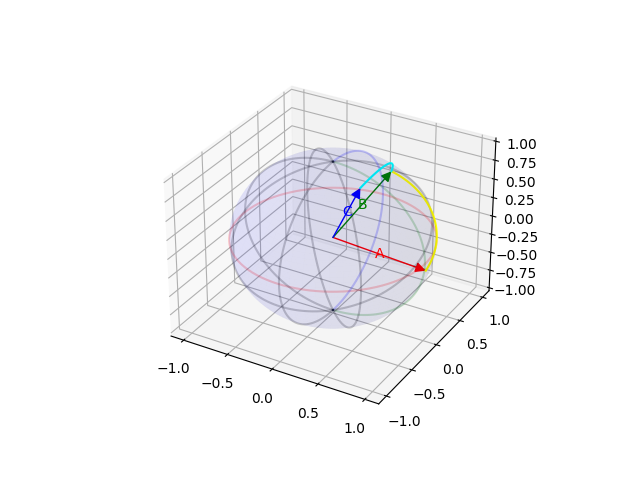

In [4]:
with UnitSpherePlot() as u :
    u.add_point(A, "A", 'r')
    u.add_point(B, "B", 'g')
    u.add_point(C, "C", 'b')
    u.add_arc(A, B, 'yellow')
    u.add_arc(B, C, 'cyan')

Given 3 cities $A$, $B$ and $C$ which make two segments: one from $A$ to $B$ and one from $B$ to $C$

$Q$ is a vector which bissect $\widehat{ABC}$ and is perpendicular to $B$

In [5]:
lineto_BA = goto.globe.lineto.LineTo(B, A)

q = lineto_BA.Ly.signed_angle_to(lineto_BC.Ly, B)
q

1.3848410085789995

In [6]:
Q = (lineto_BC.Ly + lineto_BA.Ly ).normalized()

<IPython.core.display.Javascript object>


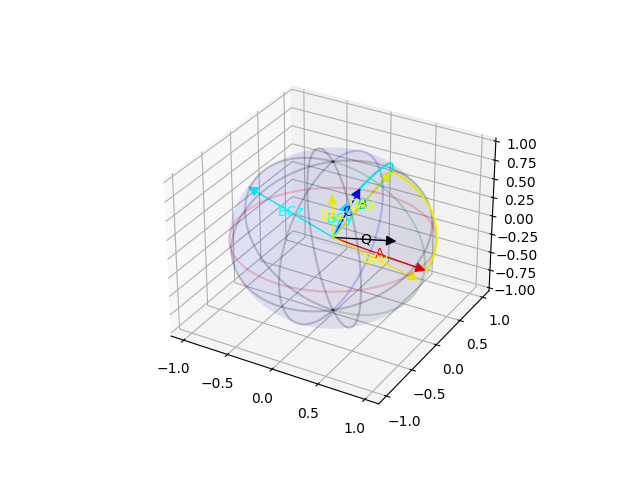

In [7]:
with UnitSpherePlot() as u :
    u.add_point(A, "A", 'r')
    u.add_point(B, "B", 'g')
    u.add_point(C, "C", 'b')
    u.add_point(Q, "Q", 'k')
    u.add_point(lineto_BC.Lx, "BCx", 'cyan')
    u.add_point(lineto_BC.Ly, "BCy", 'cyan')
    u.add_point(lineto_BC.Lz, "BCz", 'cyan')
    u.add_point(lineto_BA.Lx, "BAx", 'yellow')
    u.add_point(lineto_BA.Ly, "BAy", 'yellow')
    u.add_point(lineto_BA.Lz, "BAz", 'yellow')
    u.add_arc(B, A, 'yellow')
    u.add_arc(B, C, 'cyan')


We can compute the inner sides of the corridor, given the specified widths

In [8]:
w = math.copysign(1.0, q)

point_ab = lineto_AB.side_point(0.0, -w)
point_ba = lineto_AB.side_point(1.0, -w)
point_bc = lineto_BC.side_point(1.0, -w)
point_cb = lineto_BC.side_point(0.0, -w)
    
side_ab = goto.globe.lineto.LineTo(point_ab, point_ba)
side_bc = goto.globe.lineto.LineTo(point_bc, point_cb)

The vector $I$ is given by the intersection of the inner side of the corridor

In [9]:
I = side_ab.intersection(side_bc)

<IPython.core.display.Javascript object>


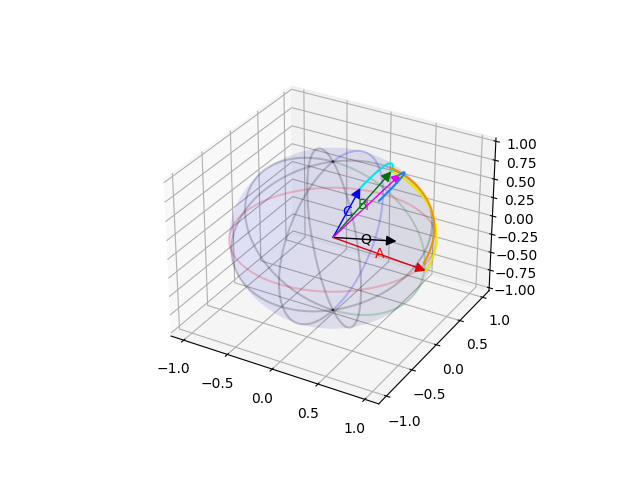

In [10]:
with UnitSpherePlot() as u :
    u.add_point(A, "A", 'r')
    u.add_point(B, "B", 'g')
    u.add_point(C, "C", 'b')
    u.add_point(Q, 'Q', 'k')
    u.add_point(I, 'I', 'magenta')
    u.add_arc(A, B, 'yellow')
    u.add_arc(B, C, 'cyan')
    u.add_arc(point_ab, point_ba, 'orange')
    u.add_arc(point_bc, point_cb, 'dodgerblue')

On défini le point $V$ comme un point construit à partir de $B$ et de $Q$

Les calculs utilisé ci-suivant sont détaillé dans le fichier cic_symbolic_wlf

In [11]:
P1 = I * Q
P2 = I * B
R1 = -(A * Q)**2 / (
    A.y**2*(-1+B.y**2) +
    2*A.x*A.z*B.x*B.z +
    2*A.y*B.y*(A.x*B.x+A.z*B.z) +
    A.z**2*(-1+B.z**2) -
    A.x**2*(B.y**2+B.z**2)
)

In [12]:
t = math.acos(math.sqrt( (P1**2 - R1)**2 / (
    P1**4 + P1**2*(1 + P2**2 - 2*R1) +
    R1*(-1 + P2**2 + R1) +
    2*math.sqrt(P1**2*P2**2*(P1**2 + (-1 + P2**2)*R1))
)))
t

0.43250584184835955

In [13]:
V = B * math.cos(t) + Q * math.sin(t)

<IPython.core.display.Javascript object>


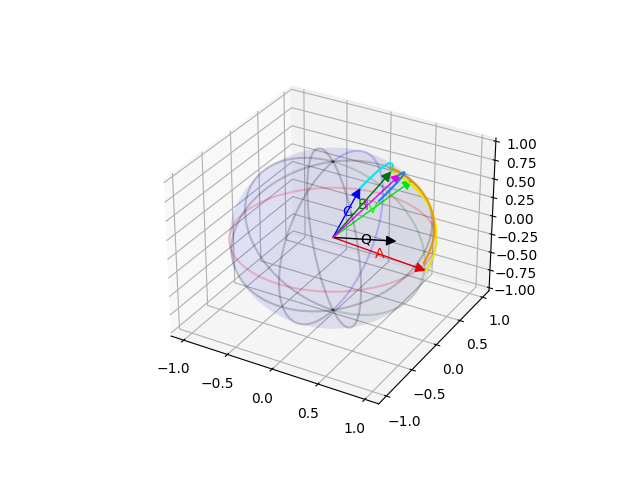

In [14]:
with UnitSpherePlot() as u :
    u.add_point(A, "A", 'r')
    u.add_point(B, "B", 'g')
    u.add_point(C, "C", 'b')
    u.add_point(Q, 'Q', 'k')
    u.add_point(V, 'V', 'lime')
    u.add_point(I, 'I', 'magenta')
    u.add_arc(A, B, 'yellow')
    u.add_arc(B, C, 'cyan')
    u.add_arc(point_ab, point_ba, 'orange')
    u.add_arc(point_bc, point_cb, 'dodgerblue')

In [15]:
V * I

0.96353440563763

In [16]:
E, null, null = lineto_BA.projection(V)
E * V

0.96353440563763

In [17]:
F, null, null = lineto_BC.projection(V)
F * V

0.96353440563763

<IPython.core.display.Javascript object>


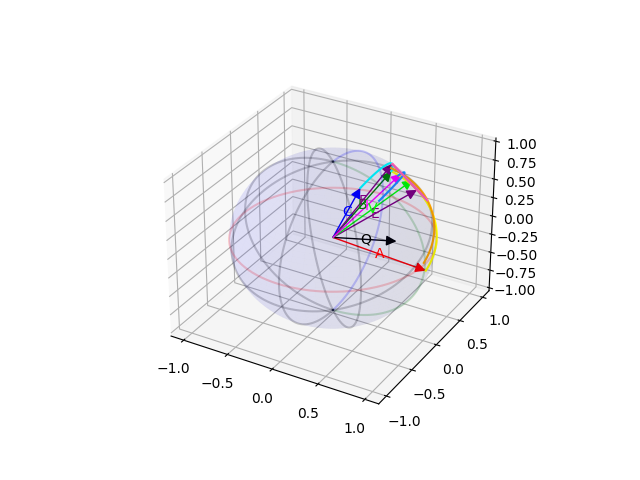

In [18]:
with UnitSpherePlot() as u :
    u.add_point(A, "A", 'r')
    u.add_point(B, "B", 'g')
    u.add_point(C, "C", 'b')
    u.add_point(Q, 'Q', 'k')
    u.add_point(E, 'E', 'purple')
    u.add_point(F, 'F', 'purple')
    u.add_point(V, 'V', 'lime')
    u.add_point(I, 'I', 'magenta')
    u.add_arc(A, B, 'yellow')
    u.add_arc(B, C, 'cyan')
    u.add_arc(point_ab, point_ba, 'orange')
    u.add_arc(point_bc, point_cb, 'dodgerblue')
    u.add_circle(V, E, 'hotpink')

In [19]:
A.x, A.y, A.z

(0.794251719609759, 0.426305460744861, -0.4329293938231181)

In [20]:
B.x, B.y, B.z

(0.4444565318238356, 0.3399936715573496, 0.8287717988807781)

In [21]:
I.x, I.y, I.z

(0.48316498890057236, 0.4689201800947046, 0.7393682831990155)

In [22]:
Q.x, Q.y, Q.z

(0.24661112454861925, 0.8429853628065601, -0.47807805988432217)

In [23]:
P1, P2, R1

(0.16097095502795594, 0.9869433110654233, 0.5924427331763411)

<IPython.core.display.Javascript object>


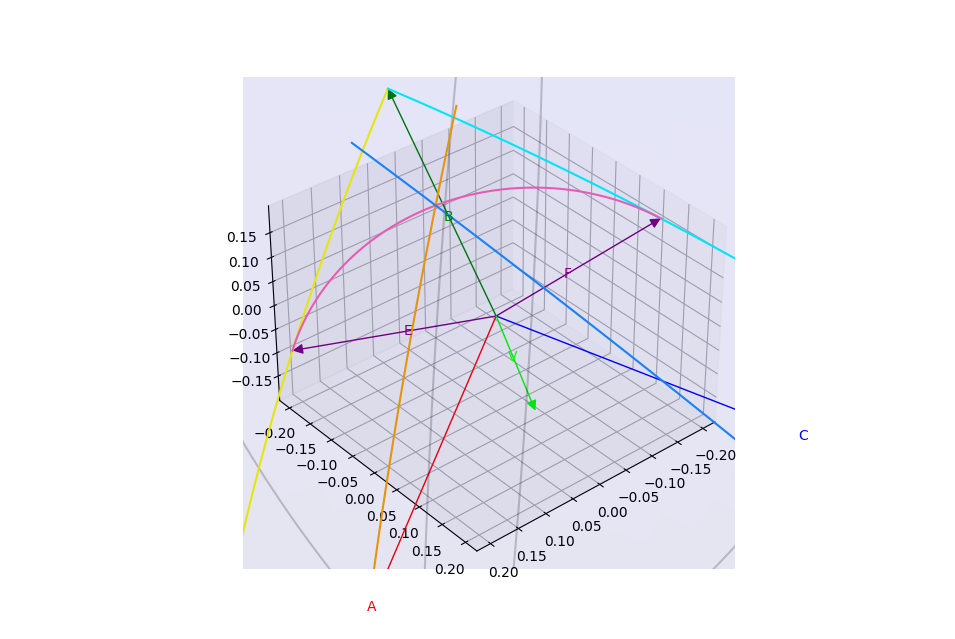

In [29]:
with UnitSpherePlot() as u :
    u.add_point(A, "A", 'r')
    u.add_point(B, "B", 'g')
    u.add_point(C, "C", 'b')
    u.add_point(E, 'E', 'purple')
    u.add_point(F, 'F', 'purple')
    u.add_point(V, 'V', 'lime')    
    u.add_arc(A, B, 'yellow')
    u.add_arc(B, C, 'cyan')
    u.add_circle_part(V, E, F, 'hotpink')
    u.add_arc(point_ab, point_ba, 'orange')
    u.add_arc(point_bc, point_cb, 'dodgerblue')